In [1]:

import warnings
warnings.filterwarnings('ignore')


%pylab inline
import pandas as pd
import seaborn as sns 

Populating the interactive namespace from numpy and matplotlib


In [2]:
# get titanic & test csv files as a DataFrame

train_data=pd.read_csv("train.csv") 
test_data=pd.read_csv("test.csv")

**Variable Description**

 - Survived: Survived (1) or died (0)
 - Pclass: Passenger's class
 - Name: Passenger's name
 - Sex: Passenger's sex
 - Age: Passenger's age
 - SibSp: Number of siblings (Soeurs etFreres) /spouses (Epouse/Epoux) aboard
 - Parch: Number of parents/children aboard
 - Ticket: Ticket number
 - Fare: Fare (Prix)
 - Cabin: Cabin
 - Embarked: Port of embarkation (Port d'embarquation)

In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
passengerId=test_data[["PassengerId"]]

Text(0.5, 1.0, 'Survival Rate by Embarked')

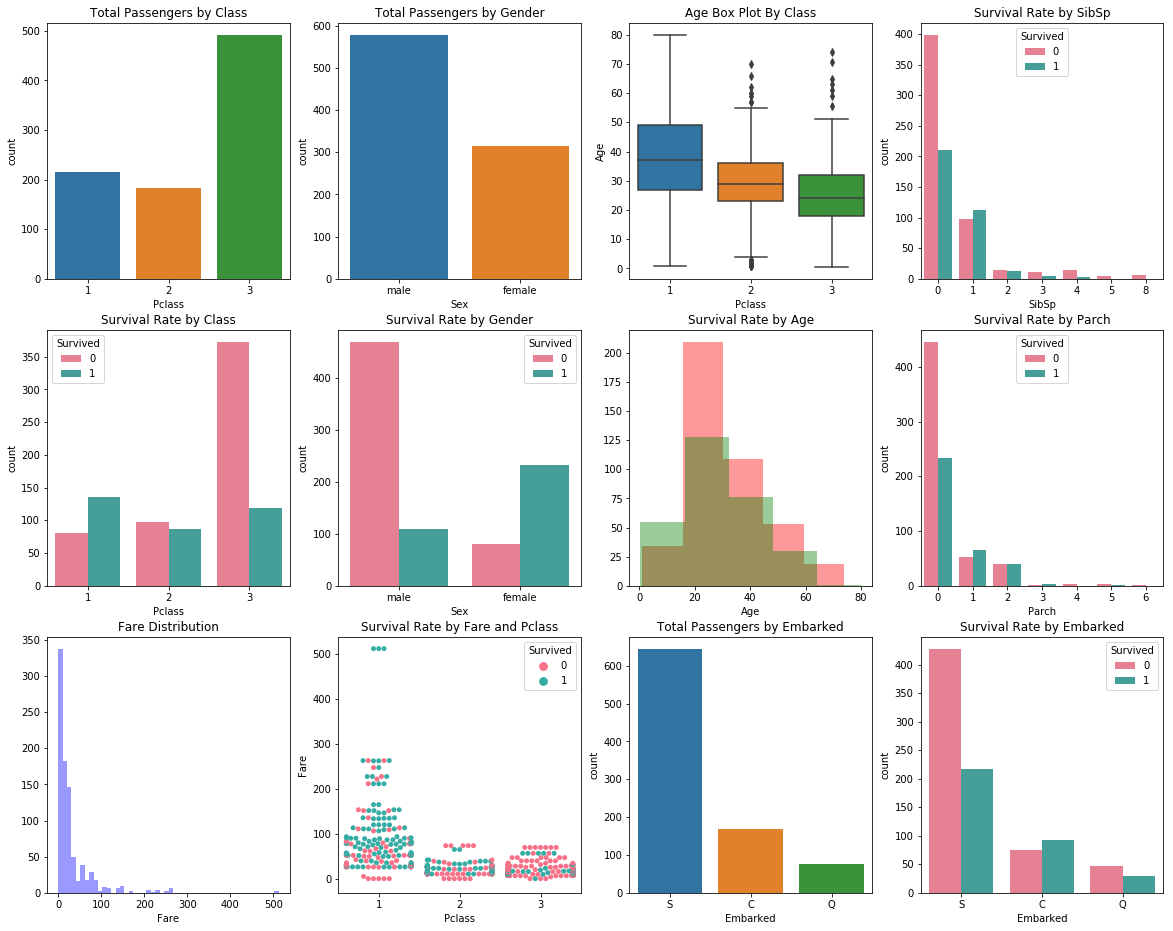

In [6]:
f,ax = plt.subplots(3,4,figsize=(20,16))

sns.countplot('Pclass',data=train_data,ax=ax[0,0]) #Les passagers par Class

sns.countplot('Sex',data=train_data,ax=ax[0,1]) #Total Passengers by Gender
sns.boxplot(x='Pclass',y='Age',data=train_data,ax=ax[0,2]) #Age Box Plot By Class
sns.countplot('SibSp',hue='Survived',data=train_data,ax=ax[0,3],palette='husl')#Proportion des survivants par soeurs/freres ou epoux
sns.distplot(train_data['Fare'].dropna(),ax=ax[2,0],kde=False,color='b')#Distribution des prix

sns.countplot('Embarked',data=train_data,ax=ax[2,2]) #Total Passengers by Embarked (Total des passagers par port d'embarcation)

sns.countplot('Pclass',hue='Survived',data=train_data,ax=ax[1,0],palette='husl') #Proportion des survivants par Classe
sns.countplot('Sex',hue='Survived',data=train_data,ax=ax[1,1],palette='husl') #Proportion des survivant par Genre

#Proportion des survivants par Age
sns.distplot(train_data[train_data['Survived']==0]['Age'].dropna(),ax=ax[1,2],kde=False,color='r',bins=5)
sns.distplot(train_data[train_data['Survived']==1]['Age'].dropna(),ax=ax[1,2],kde=False,color='g',bins=5)

sns.countplot('Parch',hue='Survived',data=train_data,ax=ax[1,3],palette='husl') #Proportion des survivants par Enfant/Parent a bord

#Proportion des survivants par Classe et Prix
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=train_data,palette='husl',ax=ax[2,1]) 

#Proportions des survivants par Port D'embarcation
sns.countplot('Embarked',hue='Survived',data=train_data,ax=ax[2,3],palette='husl')

ax[0,0].set_title('Total Passengers by Class')
ax[0,1].set_title('Total Passengers by Gender')
ax[0,2].set_title('Age Box Plot By Class')
ax[0,3].set_title('Survival Rate by SibSp')
ax[1,0].set_title('Survival Rate by Class')
ax[1,1].set_title('Survival Rate by Gender')
ax[1,2].set_title('Survival Rate by Age')
ax[1,3].set_title('Survival Rate by Parch')
ax[2,0].set_title('Fare Distribution')
ax[2,1].set_title('Survival Rate by Fare and Pclass')
ax[2,2].set_title('Total Passengers by Embarked')
ax[2,3].set_title('Survival Rate by Embarked')

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Voir le nombre de features qui possede des valeurs Null (NaN)
*Pour voir le nombre de valeur null de chaque feature dans chaque dataset,on peut appeller la methode **infos()** de DataFrame
Par exemple pour **Age** avec un nombre total de **891 entrés** seulement *741** sont non null*

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Preprocessing

In [10]:
full_data = [train_data, test_data]

In [11]:
# Drop rows with NaN values
#for dataset in full_data:
    #dataset = dataset.dropna()

Fonction qui retourne  le titre d'un nom ,en effet le nom est toujour de la forme **Prenom, Titre. Nom**

In [12]:
from nltk.tokenize import RegexpTokenizer
def getTitle(name):
    tokenizer=RegexpTokenizer("\w+") 
    title=tokenizer.tokenize(name)[1]
    return title 


 Creation d'une nouvelle variable **Title** qui va contenir le titre de chaque passager

In [13]:
#on applique la fonction getTitle dans la colonne "Name"
for dataset in full_data:
    dataset["Title"]=dataset["Name"].apply(getTitle)

train_data["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Planke', 'Dwyer', 'Don', 'Yarred',
       'Driscoll', 'Franchi', 'Rev', 'Billiard', 'der', 'Heilmann',
       'Brien', 'Jensen', 'Walle', 'Dr', 'Pelsmaeker', 'Mulder', 'y',
       'Lambert', 'Steen', 'Carlo', 'Mme', 'Impe', 'Steffansson', 'Ms',
       'Bratthammer', 'Major', 'Connor', 'Sullivan', 'Gordon',
       'Messemaeker', 'Stehli', 'Connell', 'Maeglin', 'Mlle', 'Blumer',
       'Leary', 'Col', 'Capt', 'Velde', 'the', 'Shawah', 'Jonkheer',
       'Melkebeke', 'Cruyssen'], dtype=object)

In [14]:
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady','Carlo','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                            'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Master', 'Mr')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

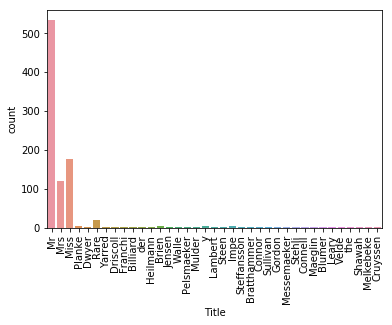

In [15]:
sns.countplot(train_data["Title"])
plt.xticks(rotation=90)

**On vois que la plupart des autres titre a part Mr,Mrs,Miss ont 1 seul valeur donc on peut les remplace par "Rare" aussi**

In [16]:

train_data["Title"].unique()[3:] #Au dela de 3eme

array(['Planke', 'Dwyer', 'Rare', 'Yarred', 'Driscoll', 'Franchi',
       'Billiard', 'der', 'Heilmann', 'Brien', 'Jensen', 'Walle',
       'Pelsmaeker', 'Mulder', 'y', 'Lambert', 'Steen', 'Impe',
       'Steffansson', 'Bratthammer', 'Connor', 'Sullivan', 'Gordon',
       'Messemaeker', 'Stehli', 'Connell', 'Maeglin', 'Blumer', 'Leary',
       'Velde', 'the', 'Shawah', 'Melkebeke', 'Cruyssen'], dtype=object)

In [17]:
others_titles=train_data["Title"].unique()[3:] 
for dataset in full_data:
    dataset["Title"]=dataset["Title"].replace(others_titles,"Rare")

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

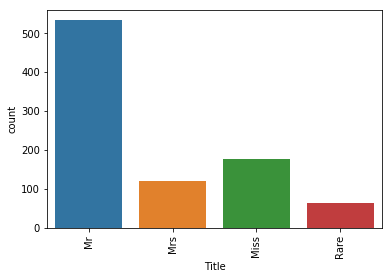

In [18]:
#Maintenant,on peut voir tres bien qu'on a pu regrouper titre en 4 Categories
sns.countplot(train_data["Title"])
plt.xticks(rotation=90)

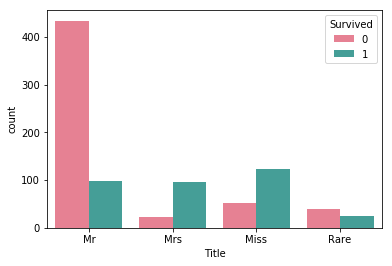

In [19]:
sns.countplot('Title',hue='Survived',data=train_data,palette='husl') #Proportion des survivants par Titre

# Mapping 
**Encode nos données en chiffres plutot que des lettres**,il existe deux methode:
* Soit utiliser la fonction **map()** de DataFrame
* Soit utiliser la classe **LabelEncoder** du module **preprocessing** de Scikit-learn

In [20]:
# Mapping Sex
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} )

"""2eme Methode"""
#from sklearn.preprocessing import LabelEncoder
#encodeur=LabelEncoder()
#train_data['Sex']=encodeur.fit_transform(train_data['Sex'])
    

'2eme Methode'

In [21]:
#Mapping Cabin
#Fonction qui retourne 1 si le passager possede une Cabine ,sinon 0
def haveCabin(cabin):
    if cabin is np.NaN:
        return 0
    else:
        return 1

#on applique cette fonction a la colonne cabin
for dataset in full_data:
    dataset["Have_cabin"]=dataset["Cabin"].apply(haveCabin)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Have_cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,0


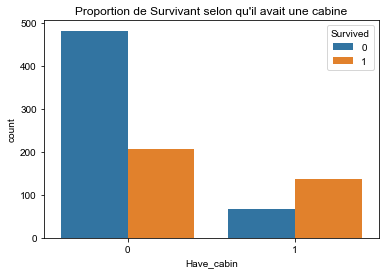

In [22]:
sns.countplot('Have_cabin',hue="Survived",data=train_data)
plt.title("Proportion de Survivant selon qu'il avait une cabine")
sns.set_style("dark")


In [23]:
# Mapping titles
for dataset in full_data:
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [24]:
# Mapping Embarked
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [25]:
# Mapping Fare
for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']= 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    #dataset['Fare'] = dataset['Fare'].astype(int)

In [26]:
# Mapping Age
for dataset in full_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 

In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Have_cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,0.0,NaN,0.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,3.0,C85,1.0,3,1
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,1.0,NaN,0.0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,3.0,C123,0.0,3,1
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,1.0,NaN,0.0,1,0


 Creation d'un nouveau variable **family_size** qui calcule le nombre de membre de famille de chaque passagers qui est egale au nombre ***SibSp* (soeurs/frere ou epoux/epouse ) + le nombre de *Parch* (parents)**

In [28]:
# Lambda expressions to create new features
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size
for dataset in full_data:
    dataset["family_size"] = dataset[["SibSp", "Parch"]].apply(lambda x:get_family_size(x["SibSp"], x["Parch"]), axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Have_cabin,family_size
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,0.0,NaN,0.0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,3.0,C85,1.0,3,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,1.0,NaN,0.0,2,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,3.0,C123,0.0,3,1,1
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,1.0,NaN,0.0,1,0,0


## Maintenant on peut supprimer certains features qui vont nous servir a rien



In [29]:
features_to_drop = ["Name", "Cabin", "Ticket","SibSp","Parch"]

train_data=train_data.drop(features_to_drop, axis=1)
test_data=test_data.drop(features_to_drop,axis=1)


In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Have_cabin,family_size
0,1,0,3,1,1.0,0.0,0.0,1,0,1
1,2,1,1,0,2.0,3.0,1.0,3,1,1
2,3,1,3,0,1.0,1.0,0.0,2,0,0
3,4,1,1,0,2.0,3.0,0.0,3,1,1
4,5,0,3,1,2.0,1.0,0.0,1,0,0


## Gestion des valeurs manquantes:
Comme toujours, il n’existe pas de meilleur moyen de traiter les valeurs manquantes. Selon vos
données, il peut suffire de les renseigner avec la moyenne ou le mode de certains groupes. 
Cependant,il existe des techniques avancées qui utilisent des parties connues des données pour imputer les
valeurs manquantes.
Une de ces méthodes est appelée **IterativeImputer**, un nouveau package de Scikit-Learn basé sur le
célèbre algorithme R pour l'imputation de variables manquantes, **MICE**

**L'Imputation itérative (Iterative imputer)** développée par Scikit-Learn et modélise chaque
fonctionnalité avec des valeurs manquantes en fonction d'autres fonctionnalités. Il utilise cela comme
une estimation pour l'imputation. À chaque étape, une entité est sélectionnée en sortie **Y** et toutes les autres entités sont
traitées en tant qu'entrées **X**. Un **régresseur** est ensuite monté sur **X** et **Y** et utilisé pour prédire les
valeurs manquantes de **Y**. Ceci est fait pour chaque fonction et répété pour plusieurs tours d'imputation.

In [33]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Have_cabin,family_size
0,892,3,1,2.0,0.0,2,1.0,0,0
1,893,3,0,2.0,0.0,0,3.0,0,1
2,894,2,1,3.0,1.0,2,1.0,0,0
3,895,3,1,1.0,1.0,0,1.0,0,0
4,896,3,0,1.0,1.0,0,3.0,0,2


In [34]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Have_cabin,family_size
0,1,0,3,1,1.0,0.0,0.0,1,0,1
1,2,1,1,0,2.0,3.0,1.0,3,1,1
2,3,1,3,0,1.0,1.0,0.0,2,0,0
3,4,1,1,0,2.0,3.0,0.0,3,1,1
4,5,0,3,1,2.0,1.0,0.0,1,0,0


In [35]:
# nécessite explicitement cette fonctionnalité expérimentale
# maintenant vous pouvez importer normalement de sklearn.impute

#from sklearn.experimental import enable_iterative_imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


# Exécuter imputer avec un estimateur de forêt aléatoire
imp = IterativeImputer (RandomForestRegressor (), max_iter = 10 , random_state = 0 )


train_data= pd.DataFrame (imp.fit_transform (train_data[["Survived","Pclass","Sex","Age","Fare","Embarked","Title","Have_cabin",
                                                         "family_size"]]), columns = train_data.columns[1:])

test_data= pd.DataFrame (imp.fit_transform (test_data[["Pclass","Sex","Age","Fare","Embarked","Title","Have_cabin",
                                                         "family_size"]]), columns= test_data.columns[1:])

In [36]:
train_data.info()
print("\n\n")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived       891 non-null float64
Pclass         891 non-null float64
Sex            891 non-null float64
Age            891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null float64
Title          891 non-null float64
Have_cabin     891 non-null float64
family_size    891 non-null float64
dtypes: float64(9)
memory usage: 62.7 KB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass         418 non-null float64
Sex            418 non-null float64
Age            418 non-null float64
Fare           418 non-null float64
Embarked       418 non-null float64
Title          418 non-null float64
Have_cabin     418 non-null float64
family_size    418 non-null float64
dtypes: float64(8)
memory usage: 26.2 KB


**On constate que tous le valeurs manquants ont tous etaient remplis avec succes**

# Pearson Correlation Heatmap
The Seaborn plotting package allows us to plot heatmaps showing the Pearson product-moment correlation coefficient (PPMCC) correlation between features. Pearson is bivariate correlation, measuring the linear correlation between two features.



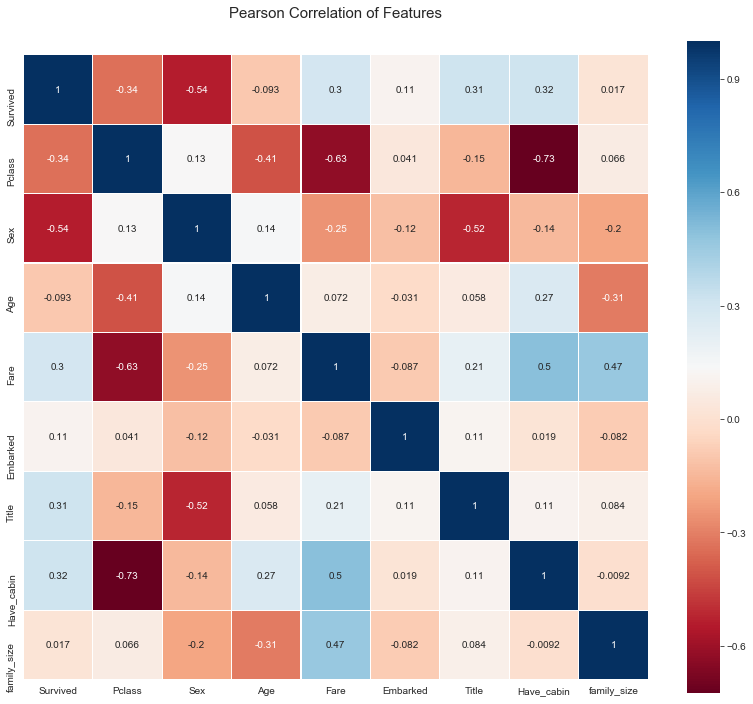

In [37]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Pairplots

Finally let us generate some pairplots to observe the distribution of data from one feature to the other.
The Seaborn pairplot class will help us visualize the distribution of a feature in relationship to each others.

<Figure size 1008x864 with 0 Axes>

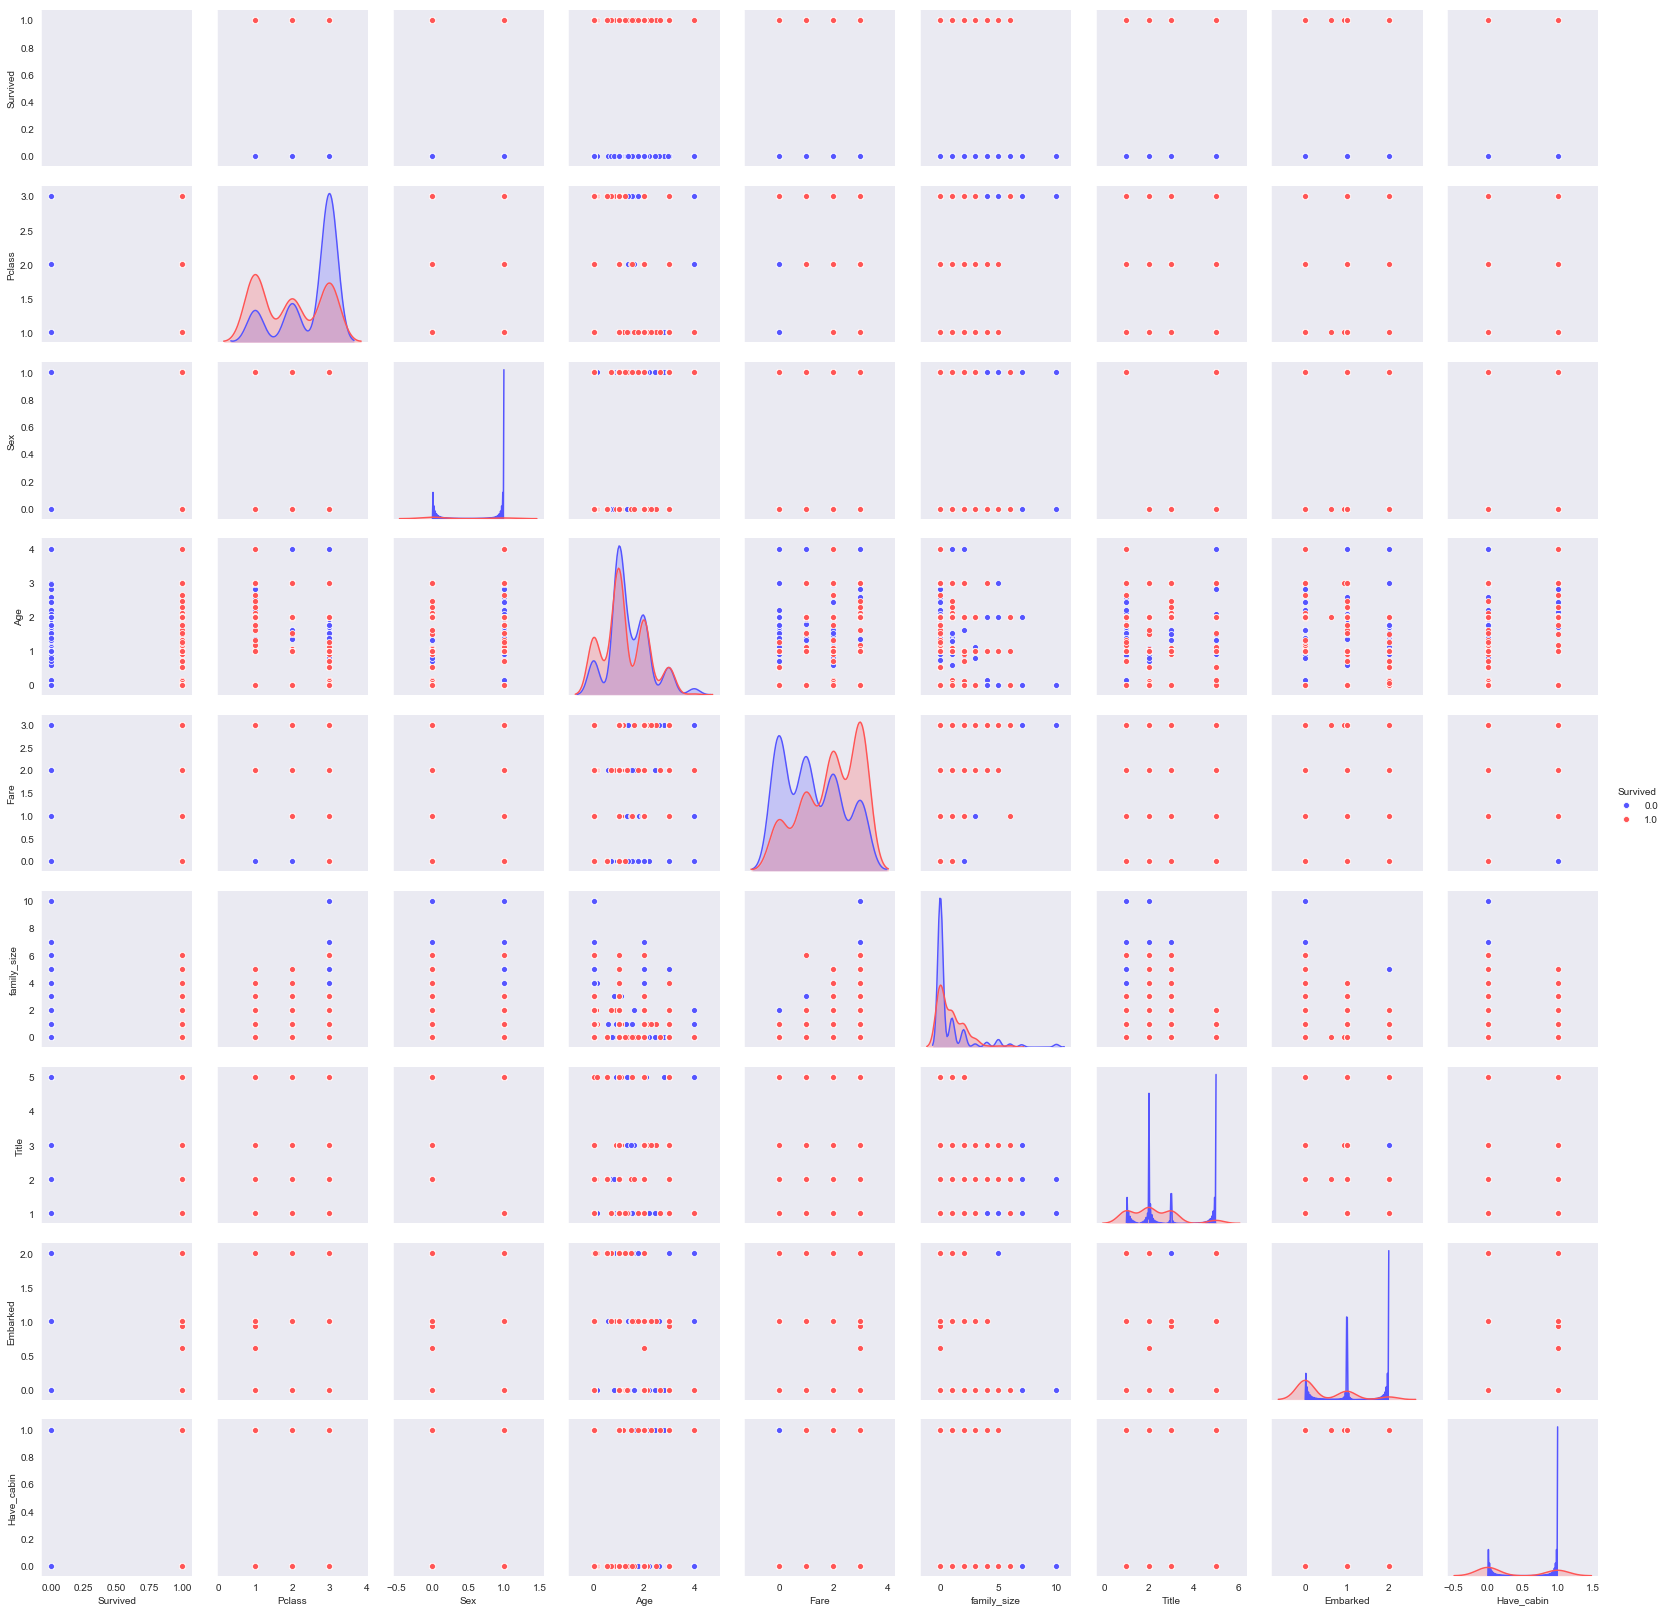

In [38]:
plt.figure(figsize=(14,12))
g = sns.pairplot(train_data[['Survived','Pclass','Sex','Age','Fare','family_size','Title','Embarked','Have_cabin',]],
                 hue='Survived', palette = 'seismic' )
#g.set(xticklabels=[])

# Split Features

In [39]:
X=train_data.drop(["Survived"],axis=1)
Y=train_data["Survived"]
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=101)


# Standardisation des features

In [40]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X_train=std_scaler.fit_transform(X_train)
X_test=std_scaler.fit_transform(X_test)

# Predictive modelling, cross-validation, hyperparameters and ensembling

## Fonction qui affiche la matrice de confusion
*soucrce:* http://localhost:8889/notebooks/Desktop/Github%20Notebooks/practicalAI-master/practicalAI-master/notebooks/05_Logistic_Regression.ipynb

In [41]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

# Plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8,8))
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes )#, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Confusion matrix
#cm = confusion_matrix(y_test, pred_test)
#plot_confusion_matrix(cm=cm, classes=["died", "survived"])
#print (classification_report(y_test, pred_test))

## 1- DecisionTreee

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
from sklearn.metrics import accuracy_score,classification_report
y_pred_tdc=dtc.predict(X_test)
score_tdc=accuracy_score(Y_test,y_pred_tdc)
print("Accuracy=",score_tdc)
#print(classification_report(Y_test,y_pred_tdc))


Accuracy= 0.7835820895522388


## 2- KNN 

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_curve,auc

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
score_knn=accuracy_score(Y_test,y_pred_knn)
print("Accuracy= ",score_knn)
#print(classification_report(Y_test,y_pred_knn))


Accuracy=  0.7873134328358209


L'aire sous la courbe AUC = 0.8405388471177945


Text(0, 0.5, 'Sensitivité')

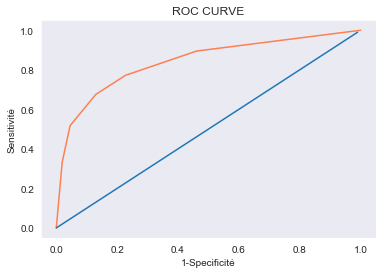

In [45]:
from sklearn.metrics import roc_curve,auc
y_pred_prob_knn=knn.predict_proba(X_test)[:,1]
fpr,tpr,thr=roc_curve(Y_test,y_pred_prob_knn)
auc_knn=auc(fpr,tpr)
print("L'aire sous la courbe AUC =",auc_knn)
plt.plot(fpr,tpr,color='coral')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01)) #ROC CURVE ALEATOIRE
plt.title("ROC CURVE")
plt.xlabel('1-Specificité')
plt.ylabel('Sensitivité')

#plt.xlim(0,1)
#plt.ylim(0,1)



## 2.1 Knn avec Validation Croisée :
on cherche le meilleur hyperparametre (n_neighbors) avec validation croisée

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_curve,auc

#Fixer les hyperparametres a tester
param_grid={'n_neighbors': np.arange(2,15)} #on test les k voisins entre 2 et 15

#choisir le score a optimiser ici c'est accuracy
score='accuracy'
#Creer le classifieur knn avec recherche d'hyperparametre par validation croisé

knn=KNeighborsClassifier()

grid_clf_knn=GridSearchCV(knn,param_grid,cv=5, #nb de k folds
                         scoring=score)
#Optimiser ce classifieur avec le jeu d'entrainement

grid_clf_knn.fit(X_train,Y_train)

#afficher l'hyperparametre optimal
print("Le meilleurs hyperparametre est : ",grid_clf_knn.best_params_)

for i in np.arange(13):
    print(grid_clf_knn.cv_results_["params"][i],
          "\tMean Test Score : ",grid_clf_knn.cv_results_["mean_test_score"][i])


Le meilleurs hyperparametre est :  {'n_neighbors': 3}
{'n_neighbors': 2} 	Mean Test Score :  0.7945425361155698
{'n_neighbors': 3} 	Mean Test Score :  0.8282504012841091
{'n_neighbors': 4} 	Mean Test Score :  0.8105939004815409
{'n_neighbors': 5} 	Mean Test Score :  0.8218298555377207
{'n_neighbors': 6} 	Mean Test Score :  0.8041733547351525
{'n_neighbors': 7} 	Mean Test Score :  0.8170144462279294
{'n_neighbors': 8} 	Mean Test Score :  0.8202247191011236
{'n_neighbors': 9} 	Mean Test Score :  0.812199036918138
{'n_neighbors': 10} 	Mean Test Score :  0.812199036918138
{'n_neighbors': 11} 	Mean Test Score :  0.8089887640449438
{'n_neighbors': 12} 	Mean Test Score :  0.8089887640449438
{'n_neighbors': 13} 	Mean Test Score :  0.8089887640449438
{'n_neighbors': 14} 	Mean Test Score :  0.8170144462279294


In [47]:
#Prediction sur le jeu de test  (GridSearchCv utilise le meilleurs model)
y_pred_gridsearch_knn=grid_clf_knn.predict(X_test)
score_gridsearch_knn=accuracy_score(Y_test,y_pred_gridsearch_knn)

print("Accuracy= ",score_gridsearch_knn)
#print(classification_report(Y_test,y_pred_gridsearch_knn))

Accuracy=  0.8022388059701493


L'aire sous la courbe AUC = 0.8251310093415357


Text(0, 0.5, 'Sensitivité')

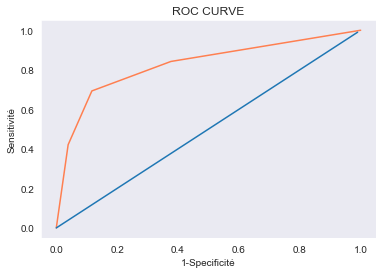

In [87]:
#Courbe ROC

from sklearn.metrics import roc_curve,auc

y_pred_prob_grid_knn=grid_clf_knn.predict_proba(X_test)[:,1]

fpr,tpr,thr=roc_curve(Y_test,y_pred_prob_grid_knn)
auc_grid_knn=auc(fpr,tpr)
print("L'aire sous la courbe AUC =",auc_grid_knn)
plt.plot(fpr,tpr,color='coral')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01)) #ROC CURVE ALEATOIRE
plt.title("ROC CURVE")
plt.xlabel('1-Specificité')
plt.ylabel('Sensitivité')

#plt.xlim(0,1)
#plt.ylim(0,1)


## 3-Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(X_train,Y_train)

y_pred_lgr=lgr.predict(X_test)

score_lgr=accuracy_score(Y_test,y_pred_gridsearch_knn)

print("Accuracy= ",score_lgr)
##print(classification_report(Y_test,y_pred_lgr))

Accuracy=  0.8022388059701493


L'aire sous la courbe AUC = 0.8598484848484849


Text(0, 0.5, 'Sensitivité')

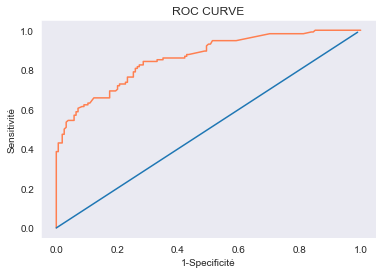

In [49]:
#Courbe ROC

from sklearn.metrics import roc_curve,auc

y_pred_prob_lgr=lgr.predict_proba(X_test)[:,1]

fpr,tpr,thr=roc_curve(Y_test,y_pred_prob_lgr)
auc_grid_knn=auc(fpr,tpr)
print("L'aire sous la courbe AUC =",auc_grid_knn)
plt.plot(fpr,tpr,color='coral')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01)) #ROC CURVE ALEATOIRE
plt.title("ROC CURVE")
plt.xlabel('1-Specificité')
plt.ylabel('Sensitivité')

## 3.1 Logistic Regression With Cross Validation

In [50]:
from sklearn.linear_model import LogisticRegressionCV

lgr_cv=LogisticRegressionCV(cv=5)
lgr_cv.fit(X_train,Y_train)

y_pred_lgr_cv=lgr_cv.predict(X_test)
score_lgr_cv=accuracy_score(Y_test,y_pred_lgr_cv)
print("Accuracy= ",score_lgr_cv)

fpr,tpr,thr=roc_curve(Y_test,lgr_cv.predict_proba(X_test)[:,1])
#auc_lgrcv=auc(fpr,tpr)
#print("AUC= ",auc_lgrcv)

Accuracy=  0.7649253731343284


## 4-Linear SVM

In [51]:
#Default Linear SVM
from sklearn.svm import LinearSVC
linear_svm=LinearSVC()
linear_svm.fit(X_train,Y_train)
y_pred_lsvm=linear_svm.predict(X_test)
score_lsvm=accuracy_score(Y_test,y_pred_lsvm)
print("Accuracy= ",score_lsvm)
fpr,tpr,thr=roc_curve(Y_test,y_pred_lsvm)
auc_lsvm=auc(fpr,tpr)
#print("AUC= ",auc_lsvm)

Accuracy=  0.7723880597014925


## 4.1 Non Linear SVM

In [52]:
from sklearn.svm import SVC

svc=SVC()


svc.fit(X_train,Y_train)
y_pred_svc=svc.predict(X_test)
score_svc=accuracy_score(Y_test,y_pred_lsvm)
print("Accuracy= ",score_svc)

fpr,tpr,thr=roc_curve(Y_test,y_pred_svc)
auc_lsvm=auc(fpr,tpr)
#print("AUC= ",auc_lsvm)

Accuracy=  0.7723880597014925


In [53]:
# SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1,10,50,100,200,300, 1000]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=5, scoring="accuracy")

gsSVMC.fit(X_train,Y_train)

y_pred_gsSVMC=gsSVMC.predict(X_test)

score_gsSVMC=accuracy_score(Y_test,y_pred_gsSVMC)
print("Accuracy= ",score_gsSVMC)



Accuracy=  0.7723880597014925


## 5-Le Bagging

In [54]:
from sklearn.ensemble import BaggingClassifier
bgg_clf=BaggingClassifier(n_estimators=5)
bgg_clf.fit(X_train,Y_train)

y_pred_bgg_clf=bgg_clf.predict(X_test)
score_bgg_clf=accuracy_score(Y_test,y_pred_bgg_clf)
print("Accuracy= ",score_bgg_clf)

Accuracy=  0.7574626865671642


## 5.1 - GreadSearch Bagging Validation Croisée

In [55]:
params={"n_estimators":np.arange(3,100)}
score="accuracy"

bgg=BaggingClassifier()

grid_bgg_clf=GridSearchCV(bgg,param_grid=params,scoring=score,cv=5,n_jobs=20)

grid_bgg_clf.fit(X_train,Y_train)

y_pred_bgg_cv=grid_bgg_clf.predict(X_test)

score_bgg_cv=accuracy_score(Y_test,y_pred_bgg_cv)
print("Accuracy= ",score_bgg_cv)

Accuracy=  0.8022388059701493


In [56]:
grid_bgg_clf.best_params_

{'n_estimators': 20}

## 6 -RandomForest

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=5)
rf.fit(X_train,Y_train)

y_pred_rf=rf.predict(X_test)
score_rf=accuracy_score(Y_test,y_pred_rf)
print("Accuracy= ",score_rf)

Accuracy=  0.8097014925373134


## 6.1 -GridSearch RandomForest Validation Croisée

In [58]:
params={"n_estimators":np.arange(5,100)}
score="accuracy"

rf=RandomForestClassifier()

grid_rf=GridSearchCV(rf,param_grid=params,scoring=score,cv=5,n_jobs=10)

grid_rf.fit(X_train,Y_train)

y_pred_rf_cv=grid_rf.predict(X_test)

score_rf_cv=accuracy_score(Y_test,y_pred_rf_cv)
print("Accuracy= ",score_rf_cv)

Accuracy=  0.8283582089552238


In [59]:
grid_rf.best_params_

{'n_estimators': 8}

## 7- Adaboost

In [60]:
from sklearn.ensemble import AdaBoostClassifier

ab=AdaBoostClassifier(n_estimators=100)

ab.fit(X_train,Y_train)
y_pred_ab=ab.predict(X_test)

score_ab=accuracy_score(Y_test,y_pred_ab)

print("Accuracy= ",score_ab)


Accuracy=  0.7611940298507462


## 8-GradientBoosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(n_estimators=100)

gb.fit(X_train,Y_train)
y_pred_gb=gb.predict(X_test)

score_gb=accuracy_score(Y_test,y_pred_gb)

print("Accuracy= ",score_gb)


Accuracy=  0.7798507462686567


## 8.1 GridSearchCV GradientBoosting 

In [62]:
params={"n_estimators":np.arange(5,100)}
score="accuracy"

gb_cv=GradientBoostingClassifier()

grid_gb=GridSearchCV(gb_cv,param_grid=params,scoring=score,cv=5,n_jobs=10)

grid_gb.fit(X_train,Y_train)

y_pred_gb_cv=grid_gb.predict(X_test)

score_gb_cv=accuracy_score(Y_test,y_pred_gb_cv)
print("Accuracy= ",score_gb_cv)

Accuracy=  0.7835820895522388


## 9-XGBOOST

In [63]:
import xgboost as xgb #importation de la bibiotheque XGBoost


#convertir le jeu de données en une structure de données optimisée appelée Dmatrix que XGBoost prend en charge 
#et qui lui procure des gains de performances et d’efficacité reconnus

data_dmatrix = xgb.DMatrix(data=X,label=Y)

xgb_clf=xgb.XGBClassifier(objective ='reg:logistic', #détermine la fonction de perte à utiliser
                             n_estimators = 10 #nombre d'arbres que vous voulez construire.
                            )

xgb_clf.fit(X_train,Y_train)

y_pred_xgb= xgb_clf.predict(X_test)

score_xgb=accuracy_score(Y_test,y_pred_xgb)
print("Accuracy= ",score_xgb)

Accuracy=  0.7873134328358209


In [64]:
params = {'n_estimator':np.arange(5,100)}

score="accuracy"

xgb_cv=xgb.XGBClassifier(objective='reg:logistic')

grid_xgb=GridSearchCV(xgb_cv,param_grid=params,scoring=score, cv=5,n_jobs=10)

grid_xgb.fit(X_train,Y_train)

y_pred_xgb_cv=grid_xgb.predict(X_test)

score_xgb_cv=accuracy_score(Y_test,y_pred_xgb_cv)
print("Accuracy= ",score_xgb_cv)

Accuracy=  0.8059701492537313


In [65]:
grid_xgb.best_params_

{'n_estimator': 5}

In [66]:
scores=[score_ab,#Adaboost
        score_xgb,score_xgb_cv,#XGBoost
        score_gb,score_gb_cv,#Gradient Boosting
        score_bgg_clf,score_bgg_cv, #Bagging
        score_lgr,score_lgr_cv,#Logistic Regression
        score_lsvm,score_svc,score_gsSVMC, #SVM
        score_knn,score_gridsearch_knn, #KNN
        score_rf,score_rf_cv,#random forest
        score_tdc #Decision treee
       ]

labels=["Adaboost",
        "XGBoost","XGBoost CV",
        "Gradient Boosting","Gradient Boosting CV",
        "Bagging","Bagging CV",
       "Log Regression","Log Regression CV",
       "Linear SVM","Non Linear SVM","Non Linear SVM CV",
       "KNN","KNN CV",
       "Random Forest","Random Forest CV",
       "Tree Decision"]

res = pd.DataFrame({"Accuracy":scores,"Algorithm":labels})

In [79]:
scores

[0.7611940298507462,
 0.7873134328358209,
 0.8059701492537313,
 0.7798507462686567,
 0.7835820895522388,
 0.7574626865671642,
 0.8022388059701493,
 0.8022388059701493,
 0.7649253731343284,
 0.7723880597014925,
 0.7723880597014925,
 0.8022388059701493,
 0.7873134328358209,
 0.8022388059701493,
 0.8097014925373134,
 0.8283582089552238,
 0.7835820895522388]

In [68]:
print(res["Accuracy"].max())

0.8283582089552238


In [69]:
score_xgb_cv

0.8059701492537313

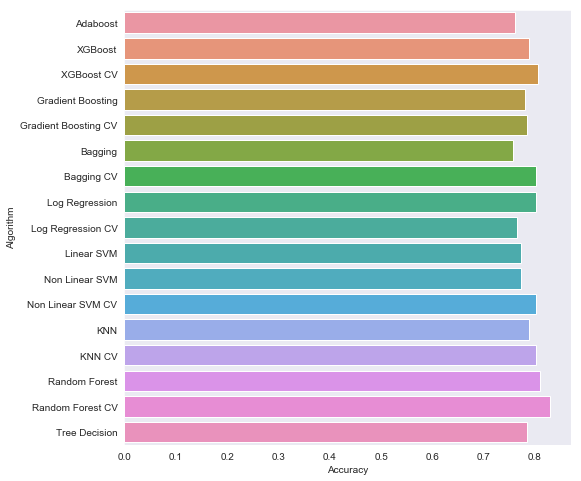

In [70]:
plt.figure(figsize=(8,8))
sns.barplot("Accuracy","Algorithm",data = res)









# Fonction qui permet de detecter les valeurs aberants
En examinant les données, il ne semble y avoir aucune entrée de données aberrante ou non acceptable.

Il y a des points aberrants potentiels que nous allons identifier (étapes de Yassine Ghouzam):

Il crée une première fonction appelée detect_outliers, qui implémente la méthode Tukey.
* Pour chaque colonne de la trame de données, cette fonction calcule les valeurs du 25ème centile (Q1) et du 75ème centile (Q3).
* L'intervalle interquartile (IQR) est une mesure de la dispersion statistique, égale à la différence entre les 75ème et 25ème percentiles, ou entre les quartiles supérieur et inférieur.
*Tous les points de données situés en dehors de 1,5 fois le IQR (1,5 fois inférieur au T1, ou 1,5 fois supérieur au Q3) sont considérés comme des valeurs aberrantes.
La colonne outlier_list_col capture les indices de ces valeurs éloignées. Toutes les données aberrantes sont ensuite extraites dans le cadre de données outlier_indices.
Enfin, la fonction detect_outliers sélectionne uniquement les valeurs éloignées se produisant plusieurs fois. C'est la trame de données qui sera retournée

In [ ]:
# Outlier detection 
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
train.loc[Outliers_to_drop] # Show the outliers rows

In [77]:
res=res.sort_values("Accuracy",ascending=False)
res.head(6)

,Accuracy,Algorithm
15,0.828358,Random Forest CV
14,0.809701,Random Forest
2,0.805970,XGBoost CV
6,0.802239,Bagging CV
7,0.802239,Log Regression
11,0.802239,Non Linear SVM CV


# Assemblage
On combine les 4 meilleurs classifieurs (BaggingCV,RandomForest,XGBoostCV,SVM CV) en utilisant le classifieur **VotingClassifier**


In [92]:
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [93]:
from sklearn.ensemble import VotingClassifier

list_classifieurs=[('RF',grid_rf.best_estimator_), #Random Forest CV 
                   ('LR',lgr),#Log Regression
                   ('Bgg',grid_bgg_clf.best_estimator_),#Bagging CV
                   ('SVC',gsSVMC.best_estimator_) #SVC CV
                  ]

VotingPredictor =VotingClassifier(estimators=list_classifieurs, voting='soft', n_jobs=4)

VotingPredictor = VotingPredictor.fit(X_train,Y_train)

VotingPredictor_predictions = VotingPredictor.predict(test_data)
#test_Survived = pd.Series(VotingPredictor_predictions, name="Survived")



In [94]:
# Preparing data for Submission 
test_Survived = pd.Series(VotingPredictor_predictions, name="Survived")
Submission3 = pd.concat([passengerId,test_Survived],axis=1)
Submission3.head(15)

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
5,897,0.0
6,898,0.0
7,899,0.0
8,900,0.0
9,901,0.0


In [95]:
# Submit File 
Submission3.to_csv("StackingSubmission.csv", index=False)

In [96]:
VotingPredictor_predictions2 = grid_rf.predict(test_data)

# Preparing data for Submission 
test_Survived2= pd.Series(VotingPredictor_predictions2, name="Survived")
Submission3 = pd.concat([passengerId,test_Survived2],axis=1)
Submission3.head(15)

# Submit File 
Submission3.to_csv("StackingSubmission2.csv", index=False)